In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('games.csv')
pd.set_option('display.max_rows', 5)

'''
id =                Game ID
rated =             Rated (T/F)
created_at =        Start Time
last_move_at =      End Time
turns =             Number of Turns
victory_status =    Game Status (how game was won)
winner =            Winner
increment_code =    Time Increment
white_id =          White Player ID
white_rating =      White Player Rating
black_id =          Black Player ID
black_rating =      Black Player Rating
moves =             All Moves in Standard Chess Notation
opening_eco =       Opening Eco (Standardised Code for any given opening)
opening_name =      Opening Name
opening_ply =       Opening Ply (Number of moves in the opening phase)
'''

'\nid =                Game ID\nrated =             Rated (T/F)\ncreated_at =        Start Time\nlast_move_at =      End Time\nturns =             Number of Turns\nvictory_status =    Game Status (how game was won)\nwinner =            Winner\nincrement_code =    Time Increment\nwhite_id =          White Player ID\nwhite_rating =      White Player Rating\nblack_id =          Black Player ID\nblack_rating =      Black Player Rating\nmoves =             All Moves in Standard Chess Notation\nopening_eco =       Opening Eco (Standardised Code for any given opening)\nopening_name =      Opening Name\nopening_ply =       Opening Ply (Number of moves in the opening phase)\n'

In [3]:
df.shape

(20058, 16)

In [4]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [5]:
df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
...,...,...,...,...,...,...
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [6]:
df.dtypes

id              object
rated             bool
                 ...  
opening_name    object
opening_ply      int64
Length: 16, dtype: object

In [7]:
df.select_dtypes(include=['number'])

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
0,1.504210e+12,1.504210e+12,13,1500,1191,5
1,1.504130e+12,1.504130e+12,16,1322,1261,4
...,...,...,...,...,...,...
20056,1.499696e+12,1.499697e+12,109,1360,1227,4
20057,1.499643e+12,1.499644e+12,78,1235,1339,3


In [8]:
df.select_dtypes(include=['object'])

,id,victory_status,winner,increment_code,white_id,black_id,moves,opening_eco,opening_name
0,TZJHLljE,outoftime,white,15+2,bourgris,a-00,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation
1,l1NXvwaE,resign,black,5+10,a-00,skinnerua,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation
...,...,...,...,...,...,...,...,...,...
20056,b0v4tRyF,resign,white,10+0,marcodisogno,jamboger,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense
20057,N8G2JHGG,mate,black,10+0,jamboger,ffbob,d4 d5 Bf4 Na6 e3 e6 c3 Nf6 Nf3 Bd7 Nbd2 b5 Bd3...,D00,Queen's Pawn Game: Mason Attack


In [9]:
df.isnull().sum()

id              0
rated           0
               ..
opening_name    0
opening_ply     0
Length: 16, dtype: int64

In [10]:
print(df.white_rating.max())
#is same as 
print(df['white_rating'].max())

2700
2700


In [11]:
df[df.white_rating == df.white_rating.max()] #inside brackets is the condition

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
13009,Y1oXTO75,False,1.494548e+12,1.494550e+12,20,resign,white,30+30,justicebot,2700,youredeadmeat,1486,e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 N1e2 Nf6...,B18,Caro-Kann Defense: Classical Variation,8


In [12]:
highestRatedPlayerWin = df[df.white_rating == df.white_rating.max()]
highestRatedPlayerWin.winner

13009    white
Name: winner, dtype: object

In [13]:
df[df.white_rating >= 2622]

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
10147,qIn8fg1t,True,1.477764e+12,1.477765e+12,149,resign,white,5+5,blitzbullet,2622,milancuruvija,2188,e4 Nc6 Nf3 d5 exd5 Qxd5 Nc3 Qa5 d4 Bg4 Be3 O-O...,B00,Nimzowitsch Defense | Declined Variation,3
13009,Y1oXTO75,False,1.494548e+12,1.494550e+12,20,resign,white,30+30,justicebot,2700,youredeadmeat,1486,e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 N1e2 Nf6...,B18,Caro-Kann Defense: Classical Variation,8


In [14]:
df[df.winner == 'white']

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


In [15]:
df.groupby('winner').get_group('white')

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


In [16]:
df.groupby('winner').white_rating.describe()

,count,mean,std,min,25%,50%,75%,max
winner,,,,,,,,
black,9107.0,1549.246184,282.916650,784.0,1351.00,1525.0,1741.00,2621.0
draw,950.0,1655.558947,310.683322,907.0,1436.25,1633.5,1873.75,2524.0
white,10001.0,1634.184182,290.360578,784.0,1436.00,1603.0,1822.00,2700.0


In [17]:
actWin = ['black', 'white']
win = df[df.winner.isin(actWin)]
#print(win)

win.groupby('winner').white_rating.describe()

,count,mean,std,min,25%,50%,75%,max
winner,,,,,,,,
black,9107.0,1549.246184,282.916650,784.0,1351.0,1525.0,1741.0,2621.0
white,10001.0,1634.184182,290.360578,784.0,1436.0,1603.0,1822.0,2700.0


array([<AxesSubplot:title={'center':'black'}>,
       <AxesSubplot:title={'center':'white'}>], dtype=object)

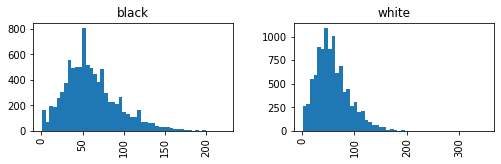

In [18]:
win.turns.hist(by=win['winner'], bins=50, figsize=(8,2))

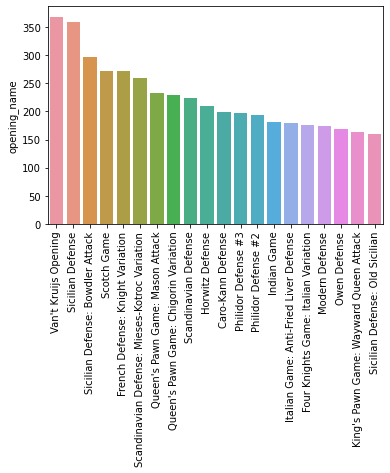

In [19]:
#barplot of most common openings
pd.set_option("display.max_rows", None, "display.max_columns", None)
counts = df.opening_name.value_counts()[:20]

plot = sns.barplot(x = counts.index, y = counts)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)
plt.show()

<AxesSubplot:>

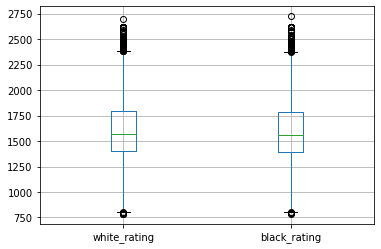

In [20]:
df.boxplot(column=['white_rating','black_rating'])

<AxesSubplot:title={'center':'white_rating'}, xlabel='winner'>

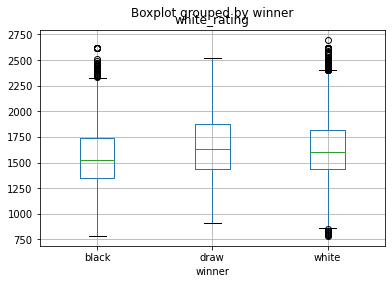

In [21]:
#df.boxplot(column=['white_rating', 'black_rating'], by='winner')
df.boxplot(column='white_rating', by='winner')

<AxesSubplot:xlabel='winner', ylabel='white_rating'>

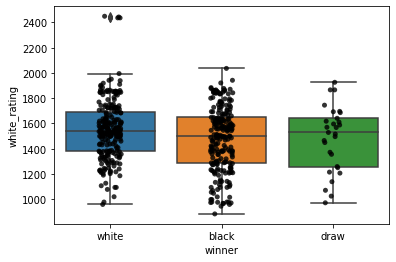

In [22]:
sns.boxplot(x='winner', y='white_rating', data=df.iloc[:500, :])
sns.stripplot(x='winner', y='white_rating', data=df.iloc[:500, :],
                jitter=True, marker='o', alpha=.8, color="black")

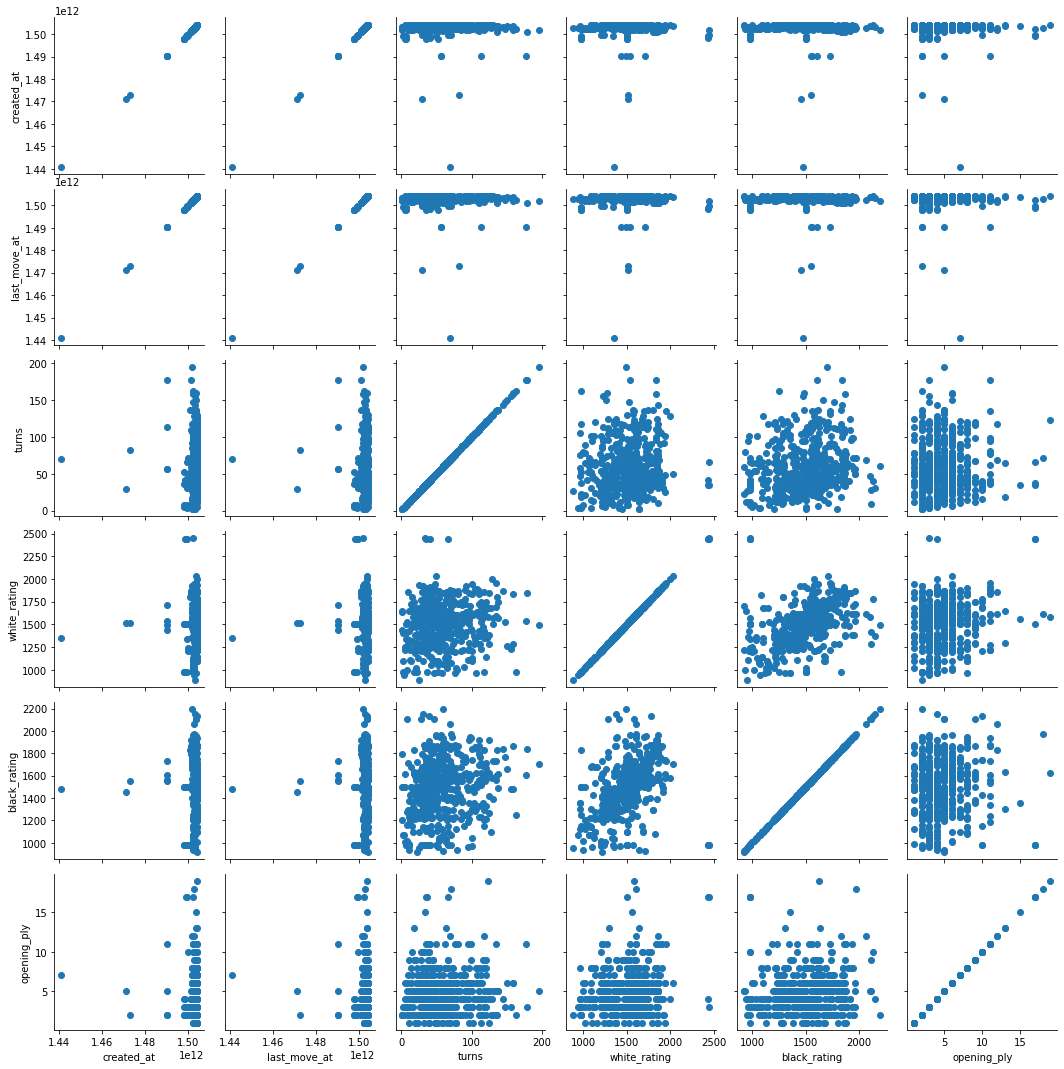

In [23]:
nums = df.select_dtypes(include=['number']).iloc[:500, :] #select all rows and only first few columns
sns.PairGrid(nums).map(plt.scatter)

In [24]:
print(pd.pivot_table(df, index=['rated'], values=['white_rating']))
print(pd.pivot_table(df, index=['rated'], values=['black_rating']))

       white_rating
rated              
False   1594.685883
True    1597.102012
       black_rating
rated              
False   1569.497310
True    1593.503188


In [25]:
print(pd.pivot_table(df, index=['winner'], values=['turns']))

            turns
winner           
black   60.724388
draw    86.157895
white   57.790221


<AxesSubplot:>

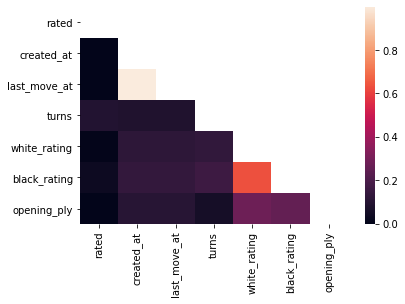

In [26]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) 
sns.heatmap(corr, mask=mask)

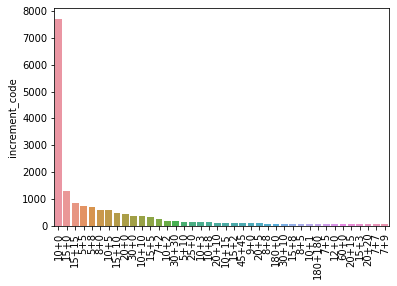

In [27]:
vc = df['increment_code'].value_counts()[:40]
chart = sns.barplot(x=vc.index, y=vc)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

In [28]:
df.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

graph for id


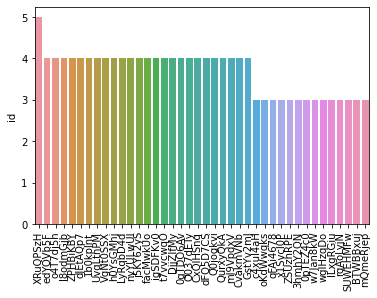

graph for rated


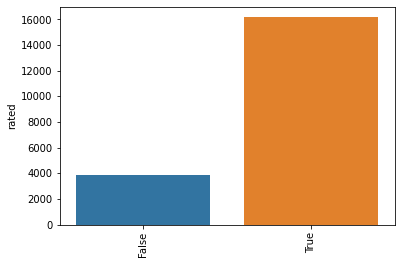

graph for turns


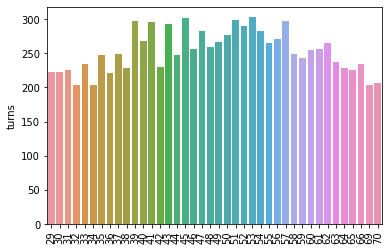

graph for victory_status


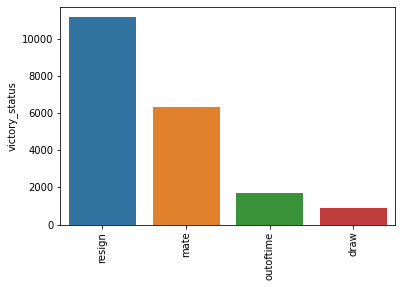

graph for winner


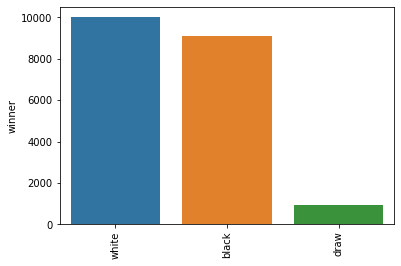

graph for increment_code


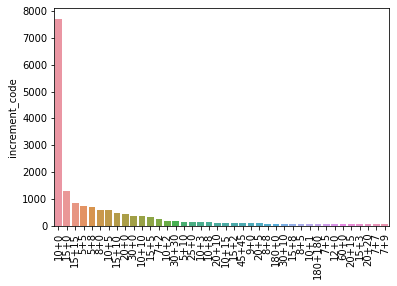

graph for opening_name


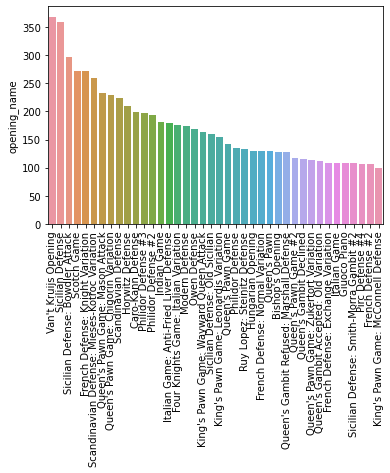

graph for white_rating


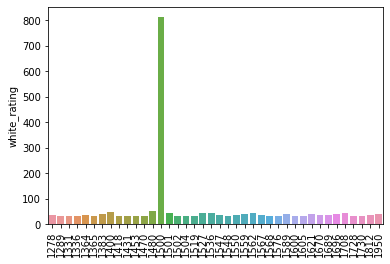

graph for black_rating


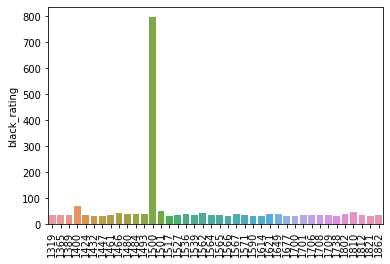

In [29]:
df_cats = df[['id', 'rated', 'turns', 'victory_status', 'winner', 'increment_code', 'opening_name',
              'white_rating', 'black_rating']]
for i in df_cats.columns:
    cat_num = df_cats[i].value_counts()[:40]
    print(f"graph for {i}")
    chart = sns.barplot(x = cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()